In [20]:
import QUANTAXIS as QA
import os
import quantaxis_ext
import numpy as np
import jupyter_helper
import pandas as pd

In [23]:
code='000538'#用来绘制图表的股票代码
info=QA.QA_fetch_stock_list().loc[code]#股票信息
info

zs_code=jupyter_helper.get_zs_code()

In [24]:
filename = os.path.join(os.getcwd(), 'datas', 'simulate','account','2005-2019','{0}.h5'.format(code))
stock_account=None
with open(filename, 'r') as f:
    stock_account = QA.QA_Account().from_message(json.load(f))
if stock_account is None:
    raise NotImplementedError()

In [25]:
risk=quantaxis_ext.QA_Risk_Ext(stock_account,benchmark_code=zs_code)

<span class="mark">**所有使用到 `market_value` 的数据均会使用构造函数中传入的是否使用复权的标志**</span>

### 最大回撤

> 最大回撤率：在选定周期内任一历史时点往后推，产品净值走到最低点时的收益率回撤幅度的最大值。最大回撤用来描述买入产品后可能出现的最糟糕的情况。最大回撤是一个重要的风险指标，对于对冲基金和数量化策略交易，该指标比波动率还重要。

In [26]:
risk.max_dropback

0.25

### 每日持仓总市值表

根据构造函数中的参数确定是否按照复权计算（默认按照复权计算）

In [27]:
risk.daily_market_value

date        account_cookie
2005-11-15  Acc_4hJ8IdPX        441.284432
2005-11-16  Acc_4hJ8IdPX        437.740928
2005-11-17  Acc_4hJ8IdPX        425.693012
2005-11-18  Acc_4hJ8IdPX        430.181451
2005-11-21  Acc_4hJ8IdPX        436.323526
2005-11-22  Acc_4hJ8IdPX        438.449628
2005-11-23  Acc_4hJ8IdPX        446.717806
2005-11-24  Acc_4hJ8IdPX        447.662740
2005-11-25  Acc_4hJ8IdPX        447.898974
2005-11-28  Acc_4hJ8IdPX        447.898974
2005-11-29  Acc_4hJ8IdPX        443.410535
2005-11-30  Acc_4hJ8IdPX        438.213395
2005-12-01  Acc_4hJ8IdPX        441.520666
2005-12-02  Acc_4hJ8IdPX        442.229367
2005-12-05  Acc_4hJ8IdPX        458.293254
2005-12-06  Acc_4hJ8IdPX        447.662740
2005-12-07  Acc_4hJ8IdPX        454.041048
2005-12-08  Acc_4hJ8IdPX        449.080142
2005-12-09  Acc_4hJ8IdPX        448.135208
2005-12-12  Acc_4hJ8IdPX        439.394563
2005-12-13  Acc_4hJ8IdPX        437.032227
2005-12-14  Acc_4hJ8IdPX        448.843908
2005-12-15  Acc_4hJ8IdPX   

### 总手续费

In [28]:
risk.total_commission

-80.0

### 总税费

In [29]:
risk.total_tax

-45.98

### 盈利额

In [30]:
risk.profit_money

4141.02

### 盈利率

In [31]:
risk.profit

0.41

### 利润

In [32]:
risk.profit_pct

date
2018-05-07         NaN
2018-05-04   -0.034480
2018-05-03    0.002930
2018-05-02   -0.010078
2018-04-27   -0.024787
2018-04-26    0.001059
2018-04-25    0.000000
2018-04-24   -0.000453
2018-04-23   -0.003629
2018-04-20    0.000379
2018-04-19   -0.002503
2018-04-18   -0.005323
2018-04-17    0.011696
2018-04-16   -0.000378
2018-04-13    0.010356
2018-04-12    0.009427
2018-04-11    0.009042
2018-04-10   -0.003966
2018-04-09   -0.014601
2018-04-04   -0.002245
2018-04-03    0.006675
2018-04-02   -0.007600
2018-03-30    0.024400
2018-03-29    0.004764
2018-03-28    0.012765
2018-03-27    0.009003
2018-03-26   -0.001642
2018-03-23   -0.011940
2018-03-22    0.003256
2018-03-21    0.004905
                ...   
2005-12-26    0.000027
2005-12-23   -0.000521
2005-12-22   -0.000659
2005-12-21    0.000165
2005-12-20   -0.001346
2005-12-19   -0.000963
2005-12-16   -0.000964
2005-12-15   -0.000028
2005-12-14    0.000579
2005-12-13   -0.001377
2005-12-12    0.000276
2005-12-09    0.001020
2005-1

### 利润构成

In [33]:
risk.profit_construct

{'total_buyandsell': 4267.0,
 'total_commission': -80.0,
 'total_profit': 4141.02,
 'total_tax': -45.98}

### 波动率

In [34]:
risk.volatility

0.18

### 闲置资金

#### 最大

In [35]:
risk.max_cashhold

14141.018999999998

#### 最小

In [36]:
risk.min_cashhold

3744.4309999999987

#### 平均

In [37]:
risk.average_cashhold

10181.35942051502

### 报表

In [38]:
risk.message_min

{'account_cookie': 'Acc_4hJ8IdPX',
 'alpha': -0.24,
 'annualize_return': 0.05,
 'benchmark_code': '399300',
 'beta': 1.0,
 'bm_annualizereturn': 0.29,
 'bm_profit': 3.45,
 'init_cash': '10000.00',
 'ir': 0.2777777777777778,
 'last_assets': '14141.02',
 'max_dropback': 0.25,
 'portfolio_cookie': None,
 'profit': 0.41,
 'profit_money': 4141.02,
 'sharpe': 0.0,
 'time_gap': 3032,
 'total_commission': -80.0,
 'total_tax': -45.98,
 'user_cookie': None,
 'volatility': 0.18}

### 绘图

#### 资金曲线叠加图

<module 'matplotlib.pyplot' from 'C:\\Users\\GuQiang\\AppData\\Local\\conda\\conda\\envs\\finance35\\lib\\site-packages\\matplotlib\\pyplot.py'>

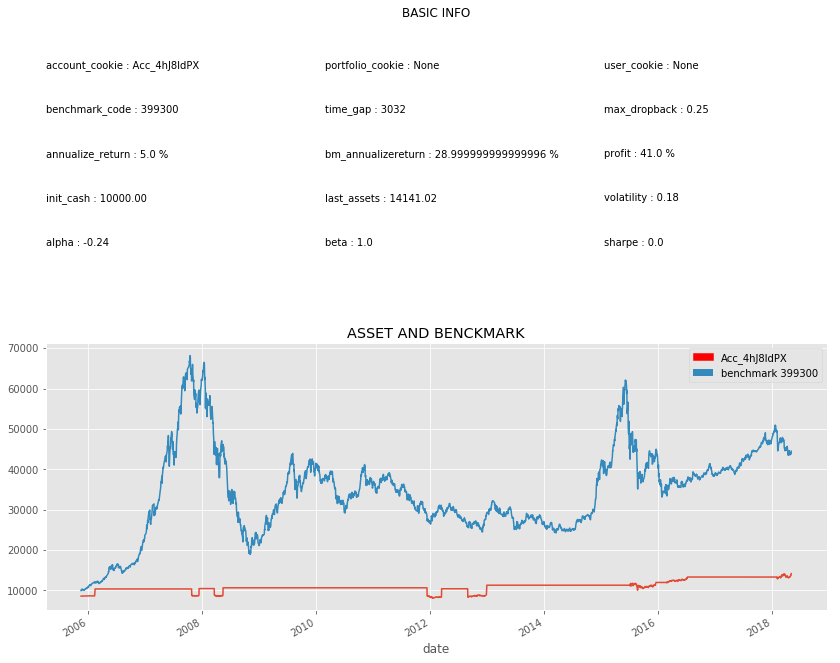

In [39]:
risk.plot_assets_curve()

#### 使用热力图画出买卖信号

<module 'matplotlib.pyplot' from 'C:\\Users\\GuQiang\\AppData\\Local\\conda\\conda\\envs\\finance35\\lib\\site-packages\\matplotlib\\pyplot.py'>

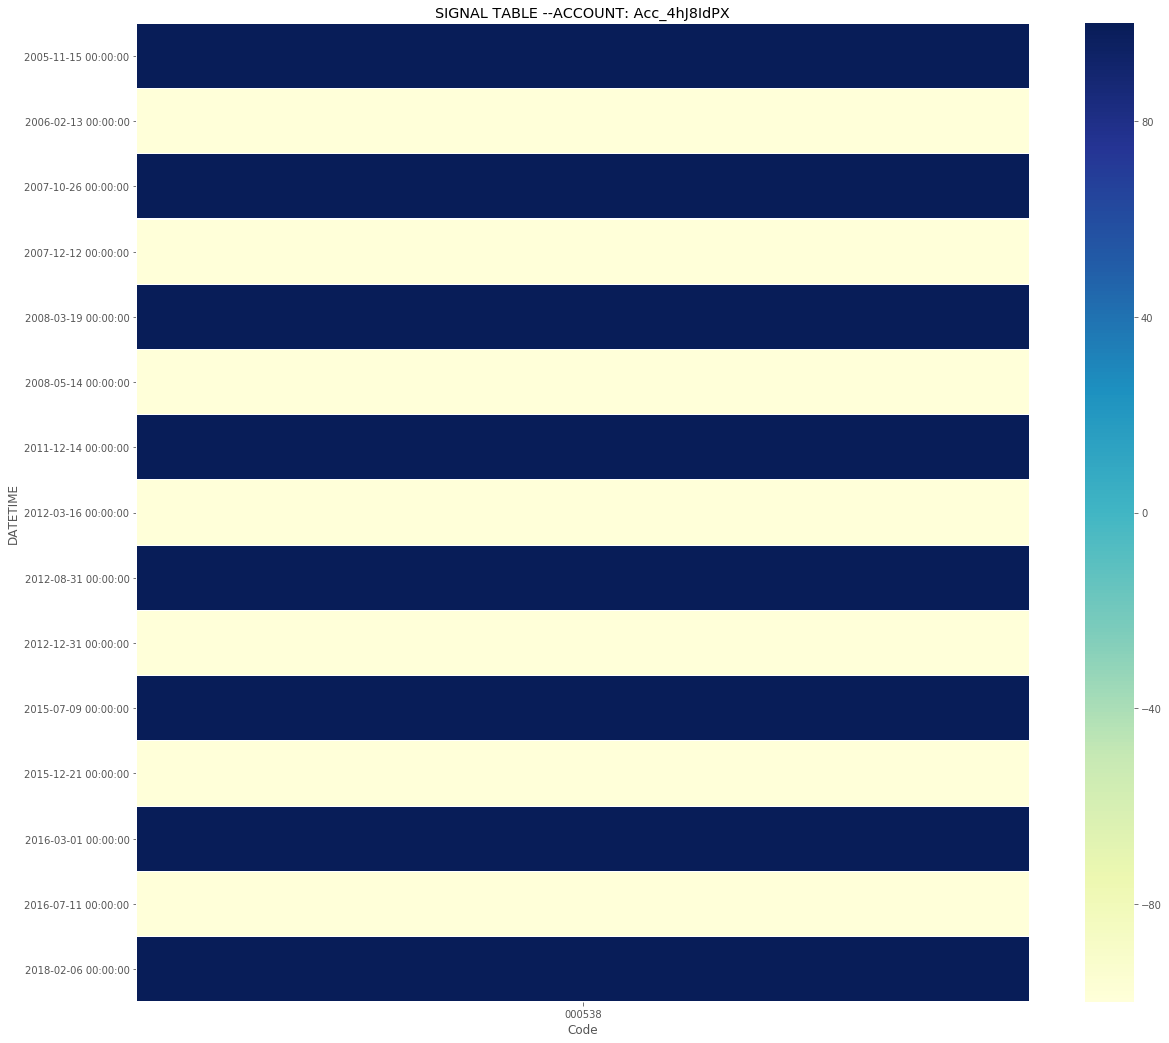

In [40]:
risk.plot_signal()